# Exercise 03 - Pandas
Aufwand: 5h

Python-Version: 3.11

IDE: Jupyter Lab

## 1)

Lesen Sie die Daten mit Hilfe von Python ein. Achten Sie hierbei auf die Formatierung der Dateien wie
Trennzeichen und Dezimalseparator.
Fügen Sie anschließend alle Dateien zu einem Datensatz zusammen. Dieser soll die Daten anschließend
chronologisch für alle verfügbaren Tage beinhalten.

In [1]:
import numpy as np
import pandas as pd
import os

Im untenstehenden Code wird durch den Ordner iteriert und die Zeilen in den Dateien durch "concat" zusammengeführt.

In [2]:
# start with reading in one file
initial_filepath = f"src/{os.listdir('src')[0]}"
data = pd.read_csv(initial_filepath, delimiter=",", decimal=".")

# automatically read in all other files
for filepath in os.listdir("src")[1:]:
    if filepath not in initial_filepath:
        data_add = pd.read_csv(f"src/{filepath}", delimiter=",", decimal=".")
        data = pd.concat([data, data_add])
        
data.sort_values(by=["Date", "Minutes"], inplace=True)
data

,Glucose,Insuline,CH,Date,Minutes,ID
0,140.0,0.095800,0.0,2014/03/27,5,1
1,139.0,0.067675,0.0,2014/03/27,10,2
2,139.0,0.062988,0.0,2014/03/27,15,3
3,141.0,0.060644,0.0,2014/03/27,20,4
4,144.0,0.059472,0.0,2014/03/27,25,5
...,...,...,...,...,...,...
256,58.0,0.000000,0.0,2014/04/05,1420,3452
257,57.0,0.000000,0.0,2014/04/05,1425,3453
258,56.0,0.000000,0.0,2014/04/05,1430,3454
259,56.0,0.000000,0.0,2014/04/05,1435,3455


## 2)

Der erste und wichtigste Schritt in der Datenverarbeitung ist, sich einen Überblick über die zur
Verfügung gestellten Daten zu verschaffen. Erstellen Sie dafür eine Statistik, welche den gegebenen
Datensatz charakterisiert, also Informationen über fehlende Werte, Mittelwerte, minimale bzw.
maximale Werte pro Features, Verteilung der einzelnen Features etc. liefert. Bereiten Sie die ermittelten
Zahlen entsprechend auf, z.B. mit Plots und / oder Tabellen. Begründen und beschreiben Sie ihr
Vorgehen ausführlich.

In [3]:
data.describe()

,Glucose,Insuline,CH,Minutes,ID
count,2601.000000,2601.000000,2739.000000,2739.000000,2739.000000
mean,168.469050,0.412337,0.048375,723.010223,1544.856152
std,61.239648,1.065895,0.494617,416.600979,1000.966215
min,-1.000000,0.000000,0.000000,5.000000,1.000000
25%,123.000000,0.046386,0.000000,360.000000,715.500000
50%,166.000000,0.083445,0.000000,725.000000,1426.000000
75%,215.000000,0.130238,0.000000,1085.000000,2149.500000
max,297.000000,9.641700,11.000000,1440.000000,3456.000000


Aus der Tabelle ist ersichtlich, dass der Glukose-Messwert deutlich mehr streut, und sich zusätzliche Missing Values mit "-1" im Datensatz befinden. Insulin streut wesentlich weniger. Außerdem haben die beiden Spalten einige Missing Values bzw. NaN-Werte. Das sieht man auch in der Ausgabe unten.

In [4]:
data.isna().sum()

Glucose     138
Insuline    138
CH            0
Date          0
Minutes       0
ID            0
dtype: int64

Zur Vollständigkeit, wird die Verteilung der Werte für Insulin und Glukose nochmals veranschaulicht:

(array([  3.,  28., 255., 303., 395., 553., 340., 341., 192., 191.]),
 array([ -1. ,  28.8,  58.6,  88.4, 118.2, 148. , 177.8, 207.6, 237.4,
        267.2, 297. ]),
 <BarContainer object of 10 artists>)

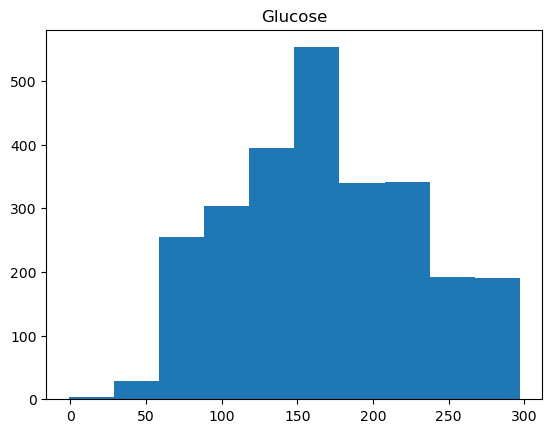

In [5]:
import matplotlib.pyplot as plt

plt.title("Glucose")
plt.hist(data["Glucose"].to_numpy())

(array([2.2e+03, 9.9e+01, 9.8e+01, 2.9e+01, 3.7e+01, 3.2e+01, 1.2e+01,
        2.5e+01, 1.0e+01, 1.2e+01, 2.2e+01, 0.0e+00, 4.0e+00, 1.1e+01,
        3.0e+00, 1.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 5.0e+00]),
 array([0.      , 0.482085, 0.96417 , 1.446255, 1.92834 , 2.410425,
        2.89251 , 3.374595, 3.85668 , 4.338765, 4.82085 , 5.302935,
        5.78502 , 6.267105, 6.74919 , 7.231275, 7.71336 , 8.195445,
        8.67753 , 9.159615, 9.6417  ]),
 <BarContainer object of 20 artists>)

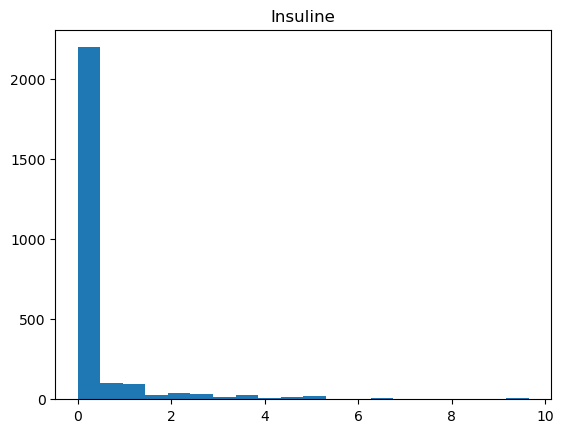

In [6]:
plt.title("Insuline")
plt.hist(data["Insuline"].to_numpy(), bins=20)

## 3)

Die Datenformate sind in der Rohform in der Form „JJJJ/MM/TT“ in einer Spalte sowie die Uhrzeit in
Minuten seit Tagesbeginn in einer weiteren Spalte aufgeführt. Überführen Sie diese beiden Spalten in
eine neue, sinnvoll formatierte Spalte „Timestamp“.

In [7]:
data["Timestamp"] = data["Date"]
data.dtypes

Glucose      float64
Insuline     float64
CH           float64
Date          object
Minutes        int64
ID             int64
Timestamp     object
dtype: object

Die Umwandlung auf Timestamps geschieht über die Methode "to_datetime", der sicherheitshalber das Datums-Format mitgegeben wird.

In [8]:
data.Timestamp = pd.to_datetime(data.Timestamp, format="%Y/%m/%d")
data.dtypes

Glucose             float64
Insuline            float64
CH                  float64
Date                 object
Minutes               int64
ID                    int64
Timestamp    datetime64[ns]
dtype: object

In [9]:
data.head()

,Glucose,Insuline,CH,Date,Minutes,ID,Timestamp
0,140.0,0.095800,0.0,2014/03/27,5,1,2014-03-27
1,139.0,0.067675,0.0,2014/03/27,10,2,2014-03-27
2,139.0,0.062988,0.0,2014/03/27,15,3,2014-03-27
3,141.0,0.060644,0.0,2014/03/27,20,4,2014-03-27
4,144.0,0.059472,0.0,2014/03/27,25,5,2014-03-27


Durch den Datentyp bzw. die obenstehende Tabelle ist die Umwandlung ersichtlich.

## 4)

Der Timestamp sollte durchgängig alle fünf Minuten eine Messung beinhalten. Durch Messfehler kann
es sein, dass ein kompletter Datensatz für eine Messung inklusive des Timestamps nicht vorhanden ist
– es also größere Sprünge als fünf Minuten gibt. Falls dem so ist, finden Sie diese Fehler und fügen Sie
eine neue Zeile für die fehlenden Zeitschritte mit passendem Timestamp ein. Alle anderen Werte der
Zeile sind dann natürlich nicht bekannt.

Die Erkennung von fehlenden Zeilen wurde über ein Sliding-Window der Größe 2 gemacht. Für jede Zeile wurde geschaut, ob sich die Minuten in der nächsten Zeile nur um 5 ändern oder nicht. Falls ja, wird eine neue Zeile angelegt und in einer Liste vermerkt. Spezialfälle sind jene Windows, bei denen sich der Timestamp ändert. Um das Iterieren über den Container nicht zu behindern, werden die neuen Zeilen erst im Nachhinein hinzugefügt und der Dataframe danach wieder sortiert.

In [10]:
missing_rows = []
for window in data.rolling(window=2):
    if len(window) == 2:
        prevd, nextd = window["Timestamp"]
        prevv, nextv = window["Minutes"]
        
        # check if day was skipped and correct values
        if prevd != nextd:
            nextv += 1440
        
        diff = np.abs(nextv - prevv)
        
        # Two successive days should only differ by five minutes.
        if diff != 5:
            new_row = {
                "Glucose": pd.NA,
                "Insuline": pd.NA,
                "CH": pd.NA,
                "Date": str(prevd) if prevv != 1440 else str(nextd),
                "Minutes": prevv+5 if prevv != 1440 else 5,
                "Timestamp": prevd if prevv != 1440 else nextd
            }
            missing_rows.append(new_row)
            
# Copy the data, then append new rows
corrected_data = data.copy(deep=True)
for missing_row in missing_rows:
    corrected_data.loc[len(corrected_data)] = missing_row
    
# sort them by timestamp and minutes, and while we're at it, also deal with the "-1"s.
corrected_data.sort_values(by=["Timestamp", "Minutes"], inplace=True)
corrected_data.Glucose.replace(-1, np.nan, inplace=True)
corrected_data.describe()

,Glucose,Insuline,CH,Minutes,ID
count,2598.000000,2601.000000,2739.000000,2868.000000,2739.000000
mean,168.664742,0.412337,0.048375,722.923640,1544.856152
std,61.003377,1.065895,0.494617,415.748853,1000.966215
min,56.000000,0.000000,0.000000,5.000000,1.000000
25%,123.000000,0.046386,0.000000,363.750000,715.500000
50%,166.000000,0.083445,0.000000,725.000000,1426.000000
75%,215.000000,0.130238,0.000000,1081.250000,2149.500000
max,297.000000,9.641700,11.000000,1440.000000,3456.000000


In [11]:
print(len(data), len(corrected_data))

2739 2868


## 5)

Generieren Sie die „Missingness Matrix“ und plotten Sie diese.

Für diese Aufgabe kann die bestehende Library "missingno" verwendet werden, die zudem auch nach einem coolen Pokémon benannt ist. :)

<Axes: >

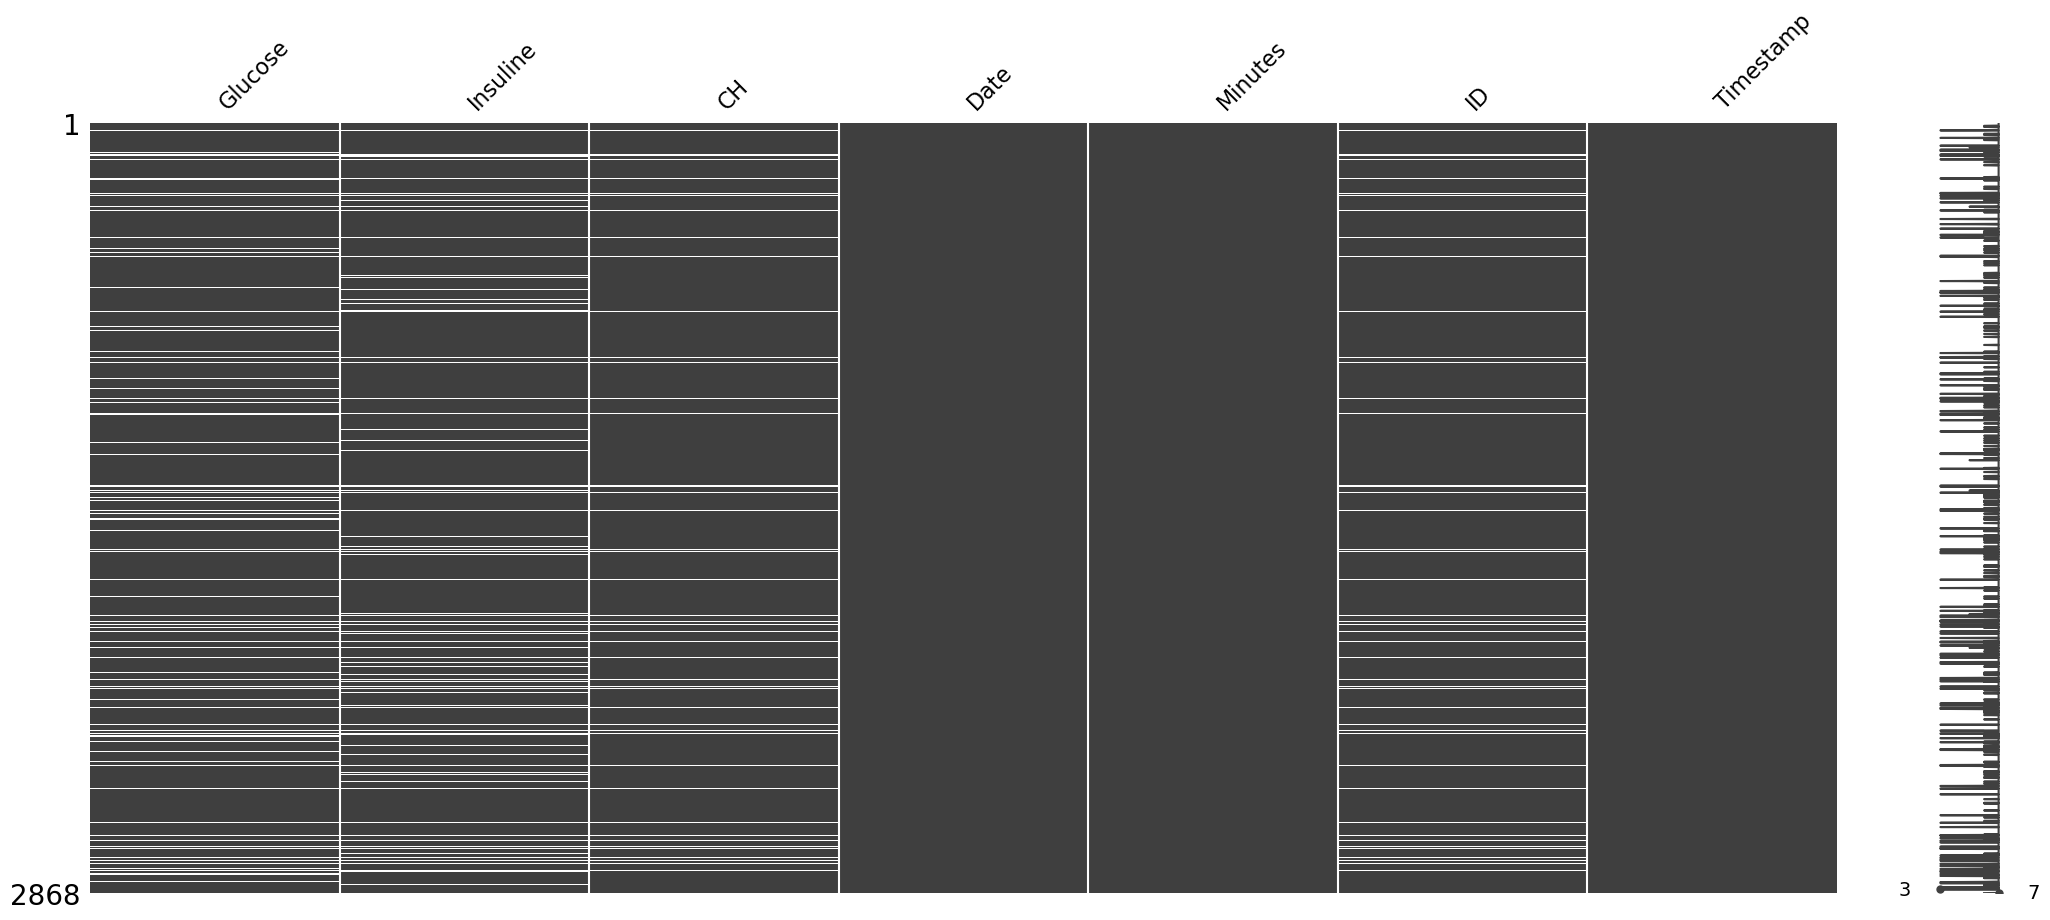

In [12]:
import missingno

missingno.matrix(corrected_data)

In der obenstehenden Grafik ist ersichtlich, bei welchen Zeilen (Id) bzw. wo sich die Missing-Values aufhalten. 

## 6)

Implementieren Sie ein Skript / Programm in dem Sie folgende „Missing Value Strategien“ für den
Glukosewert sowie den Insulinwert ausimplementieren:

a. Zeilenweises Entfernen von Missing Values

In [13]:
# Drop all rows containing "NA"
dropped = corrected_data.dropna()

b. Ersetzung durch Mittelwerte

In [14]:
# Replace value in all rows containing "NA" with mean
mean = corrected_data.copy(deep=True)
print(mean.isna().sum())
mean["Glucose"] = mean["Glucose"].replace(np.nan, np.mean(mean.Glucose))
mean["Insuline"] = mean["Insuline"].replace(np.nan, np.mean(mean.Insuline))
print("---------------")
print(mean.isna().sum())

Glucose      270
Insuline     267
CH           129
Date           0
Minutes        0
ID           129
Timestamp      0
dtype: int64
---------------
Glucose        0
Insuline       0
CH           129
Date           0
Minutes        0
ID           129
Timestamp      0
dtype: int64


c. Ersetzung durch einen zufälligen Wert

In [15]:
# Replace value in all rows containing "NA" with random values
rand = corrected_data.copy(deep=True)
print(rand.isna().sum())
rand_gluc = np.random.normal(loc=np.mean(rand.Glucose), scale = np.std(rand.Glucose), size=rand.Glucose.isna().sum())
rand_insu = np.random.normal(loc=np.mean(rand.Insuline), scale = np.std(rand.Insuline), size=rand.Insuline.isna().sum())
rand.loc[rand.Glucose.isnull(), "Glucose"] = rand_gluc
rand.loc[rand.Insuline.isnull(), "Insuline"] = rand_insu
print("---------------")
print(rand.isna().sum())

Glucose      270
Insuline     267
CH           129
Date           0
Minutes        0
ID           129
Timestamp      0
dtype: int64
---------------
Glucose        0
Insuline       0
CH           129
Date           0
Minutes        0
ID           129
Timestamp      0
dtype: int64


Hier wurde im Vorhinein eine Liste an randomisierten Werten erzeugt, und dann alle NaN-Werte damit überschrieben. Die randomisierten Werte stammen aus einer Verteilung, die zu den Daten gehören könnte.

d. Interpolation durch Regression

In [16]:
# Replace value in all rows containing "NA" with interpolated values
interp = corrected_data.copy(deep=True).reset_index(drop=True)
interp.Glucose = interp.Glucose.interpolate(method='polynomial', order=15)
interp.Insuline = interp.Insuline.interpolate(method='polynomial', order=5)
print(interp.isna().sum())

Glucose        1
Insuline       0
CH           129
Date           0
Minutes        0
ID           129
Timestamp      0
dtype: int64


In [17]:
interp.Glucose[len(interp.Glucose)-1]

nan

Hierbei wurde, anhand von einer vorherigen Analyse der Daten, entsprechend der Grad der Polynome gewählt. Glukose wirkt sehr hochdimensional, während Insulin meist nur wenige Änderungen im Steigungsverhalten aufweist. Hierbei ist auch zu beachten, dass eine Interpolation für 1 Element nicht möglich ist. Das kommt daher, dass das Element an letzter Stelle steht, und somit eine Extrapolation wäre, wie im oberen Feld zu sehen ist.

## 7)

In [18]:
dropped.to_csv("out/drop_strategy.csv", sep=",", decimal=".", index=False)
mean.to_csv("out/mean_strategy.csv", sep=",", decimal=".", index=False)
rand.to_csv("out/rand_strategy.csv", sep=",", decimal=".", index=False)
interp.to_csv("out/interp_strategy.csv", sep=",", decimal=".", index=False)

Jedes File wird mit "," als Separator, und "." als Dezimalzeichen gespeichert.